# Malaria Detection Model Using Neural Networks

**Implement Deep Learning Model to identify whether the sample of a blood is infected by Malaria or not**



1.   Perpare DataSet
2.   Data Processing
3.   Test the Model



In [10]:
import tensorflow as tf
import numpy as np
import seaborn as sns ### visualization
import matplotlib.pyplot as plt### plotting bar chart
import tensorflow_datasets as tfd

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Perpare DataSet

In [ ]:
dataSet , dataSet_info = tfd.load('malaria',with_info= True, as_supervised=True, shuffle_files=True, split=['train'])

In [ ]:
def split_dataSet(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    DATASET_SIZE = dataset.cardinality().numpy()  # Get the size of the dataset

    # Calculate how many samples should go into each split
    train_size = int(DATASET_SIZE * TRAIN_RATIO)
    val_size = int(DATASET_SIZE * VAL_RATIO)

    # Split the dataset using take() and skip()
    train_dataset = dataset.take(train_size)  # Take the first `train_size` samples for training
    val_dataset = dataset.skip(train_size).take(val_size)  # Skip the training set and take validation samples
    test_dataset = dataset.skip(train_size + val_size)  # The rest goes to the test dataset

    return train_dataset, val_dataset, test_dataset


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO=0.1
TEST_RATIO=0.1

train_dataset, val_dataset, test_dataset =  split_dataSet(dataSet[0] ,TRAIN_RATIO,  VAL_RATIO, TEST_RATIO )


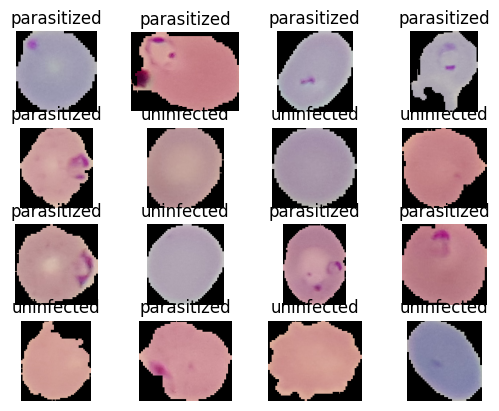

In [ ]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i + 1)

  plt.imshow(image)
  plt.title(dataSet_info.features['label'].int2str(label))
  plt.axis('off')

## Data Processing



*   Reshape the Images to a Fixed Size
*   Model Creation
*   Model Test and Evaluate





In [ ]:
def resize_rescale(image, label):
    return tf.image.resize(image , (244,244))/255.0 ,label

In [ ]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)


In [ ]:
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

The role of Neural Networks is to identifiy the elements of the kernel Automatically

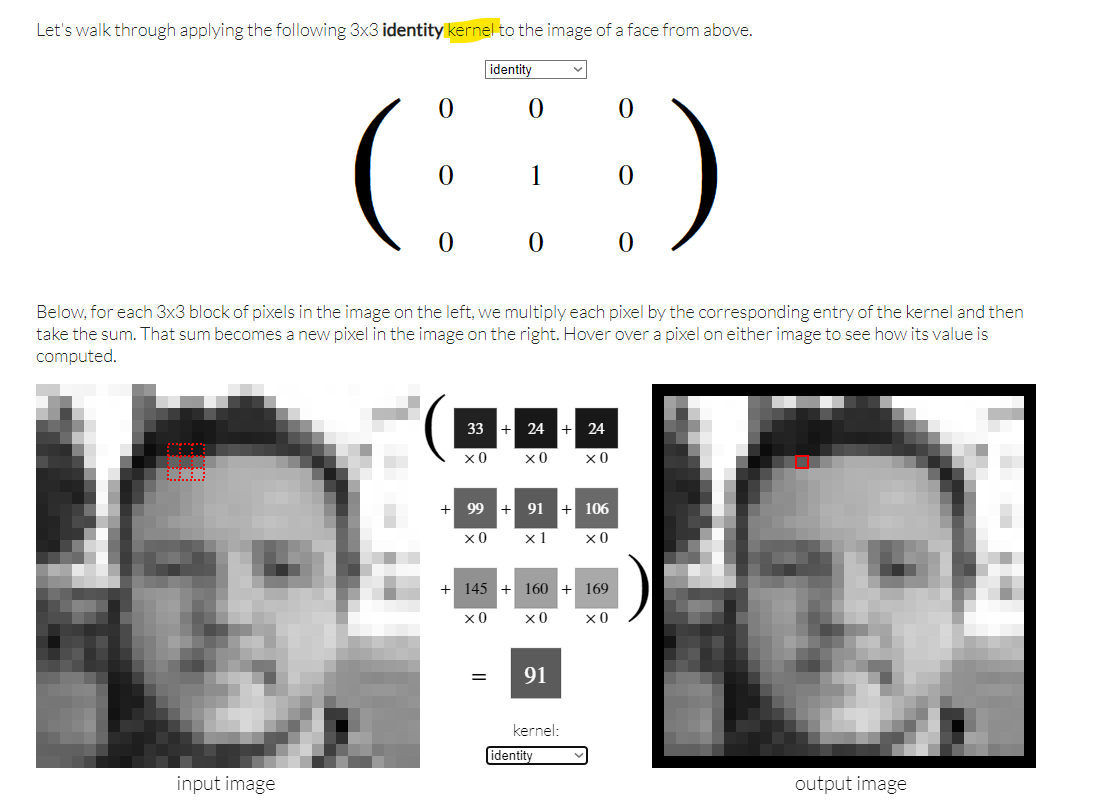

**Model Design**



*  Input Layer

      Input the size of image by the wanted size

*   A Conv2D

    A Conv2D (2D Convolutional) layer in TensorFlow and Keras is a key component of Convolutional Neural Networks (CNNs),
which are widely used for image-related tasks. The main purpose of a Conv2D layer is to extract features from an input image by applying a set of filters
(also called kernels) across the image.
This process helps in detecting patterns such as edges, textures, and more complex features as the network goes deeper.



*   MaxPool2D

    A MaxPool2D (2D Max Pooling) layer in TensorFlow and Keras is used in Convolutional Neural Networks (CNNs) to downsample the spatial dimensions (height and width) of the input while retaining the most important features. The primary goal of MaxPool2D is to reduce the size of feature maps, making the model more computationally efficient and reducing overfitting.

*   Flatten

    A Flatten layer in TensorFlow and Keras is used to convert a multi-dimensional input (such as a 2D image or feature map) into a one-dimensional vector. This transformation is necessary when transitioning from convolutional layers, which output multi-dimensional data, to fully connected (dense) layers, which expect one-dimensional input.


*  BatchNormalization

    The BatchNormalization layer in a deep learning model helps improve training stability and performance by normalizing the inputs to each layer. It scales and shifts the inputs to ensure they have a standard distribution (mean near 0 and variance near 1). This prevents internal covariate shift, where the distribution of inputs changes across layers during training, making training faster and more reliable.










In [ ]:
model = tf.keras.Sequential([InputLayer((244,244,3)),
                             Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu'),
                             BatchNormalization(),
                             MaxPool2D(pool_size=2 , strides=2),

                             Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu'),
                             BatchNormalization(),
                             MaxPool2D(pool_size=2 , strides=2),

                             Flatten(),

                             Dense(100, activation= 'relu'),
                             BatchNormalization(),
                             Dense(10, activation= 'relu'),
                             BatchNormalization(),
                             Dense(1, activation= 'sigmoid'),
                             ])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 242, 242, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 242, 242, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 121, 121, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 119, 119, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 119, 119, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 59, 59, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 55696)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       5,569,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,572,297 (21.26 MB)

 Trainable params: 5,572,033 (21.26 MB)

 Non-trainable params: 264 (1.03 KB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01) , loss=BinaryCrossentropy() , metrics =["accuracy"] )

In [ ]:
model.fit(train_dataset , validation_data= val_dataset , epochs=30 , verbose=1 )
# Save the entire model
model.save('/content/drive/MyDrive/Deep Learning Models/Malaria_Detection.h5')

Epoch 1/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.8162 - loss: 0.4019 - val_accuracy: 0.6156 - val_loss: 0.7848
Epoch 2/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 53s 73ms/step - accuracy: 0.9362 - loss: 0.1896 - val_accuracy: 0.5074 - val_loss: 1.3274
Epoch 3/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 54s 78ms/step - accuracy: 0.9440 - loss: 0.1698 - val_accuracy: 0.9289 - val_loss: 0.2262
Epoch 4/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 49s 71ms/step - accuracy: 0.9514 - loss: 0.1538 - val_accuracy: 0.8555 - val_loss: 1.1378
Epoch 5/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 48s 70ms/step - accuracy: 0.9510 - loss: 0.1503 - val_accuracy: 0.6701 - val_loss: 0.6101
Epoch 6/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.9467 - loss: 0.1674 - val_accuracy: 0.9463 - val_loss: 1.0433
Epoch 7/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 56s 81ms/step - accuracy: 0.9454 - loss: 0.1678 - val_accuracy: 0.8113 - val_loss: 5.5735
Epoch 8/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 48s 70ms/step - accuracy: 0.9406 - loss: 0.1840 -

In [ ]:
test_dataset =  test_dataset.batch(1)
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
model.evaluate(test_dataset)

2757/2757 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9387 - loss: 0.3800


[0.4208580255508423, 0.9307218194007874]

In [ ]:
model.predict(test_dataset.take(1))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


0.99975485

In [21]:
def parasite_or_not(x):
  if(x>0.5):
    return str('Uninfected')
  else:
    return str('parasitized')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


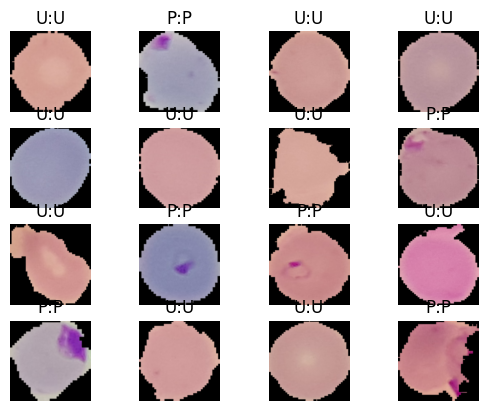

In [ ]:
for i, (image, label) in enumerate(test_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0]))  + ":" + str(parasite_or_not(model.predict(image)[0][0])))

  plt.axis('off')


## Model Loading from Drive

In [2]:
model = load_model('/content/drive/MyDrive/Deep Learning Models/Malaria_Detection.h5')

In [40]:
def predict_malaria(model, image_path):
    img = image.load_img(image_path, target_size=(244,244))  # Match the training image size
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize if needed
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make the prediction
    prediction = model.predict(img_array)[0][0]

    ##predicted_class = np.argmax(prediction, axis=1)
    plt.imshow(img)
    print(parasite_or_not(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
parasitized


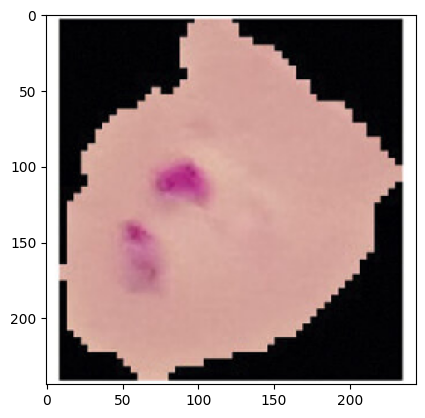

In [45]:
predict_malaria(model ,'/content/drive/MyDrive/Deep Learning Models/parasitized.jpg')
